### Entraînement

#### Partie 4 - Création de l'architecture U-NET et entraînement du model


In [1]:
%matplotlib inline

import random
import numpy as np
import os
import sys
from IPython.display import display
import tensorflow as tf
import datetime
from keras import callbacks
from keras.models import load_model
tf.debugging.set_log_device_placement(False)
tf.get_logger().setLevel('WARNING')
tf.autograph.set_verbosity(1)

sys.path.append('..')
import Modules.utils as utils
import Modules.init as init
import Modules.display as disp
import Modules.generator as gen
import Modules.model as model

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

datasets_dir = init.init('U-NET analysis')

<br>**Projet M1 - Détection d'anomalies sur imagerie médicale - U-NET analysis**

Version              : 2
Notebook id          : U-NET analysis
Run time             : Monday 13 February 2023, 15:20:51
Hostname             : DESKTOP-FRB70CL (Windows)
Tensorflow log level : Error only  (=2)
Datasets dir         : C:/Users/Marc/Desktop/DATASET2
Run dir              : ./run
Update keras cache   : False
tensorflow           : 2.10.1
tensorflow.keras     : 2.10.0
numpy                : 1.21.5
skimage              : 0.19.2
matplotlib           : 3.5.2
pandas               : 1.4.4


In [4]:
seed=24
batch_size= 100

val_img_path = os.path.join(datasets_dir, 'DATASET', 'Train', 'Images')
val_mask_path = os.path.join(datasets_dir, 'DATASET', 'Train', 'Masks')
val_img_gen = gen.trainGenerator(val_img_path, val_mask_path, batch_size, seed)

model = load_model("ENDOMETRIOSIS_UNET_SEG_BC.hdf5", compile=False)

test_image_batch, test_mask_batch = val_img_gen.__next__()

Found 1244 images belonging to 1 classes.
Found 1244 images belonging to 1 classes.


In [5]:
y_pred=model.predict(test_image_batch)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_argmax = np.argmax(test_mask_batch, axis=3)

1/4 [======>.......................] - ETA: 20s

ResourceExhaustedError: Graph execution error:

Detected at node 'model_1/concatenate_7/concat' defined at (most recent call last):
    File "C:\Users\Marc\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Marc\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Marc\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Marc\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Marc\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Marc\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Marc\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Marc\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Marc\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Marc\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Marc\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Marc\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Marc\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Marc\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Marc\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\Marc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\Marc\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Marc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Marc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Marc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_24200\1149368031.py", line 1, in <module>
      y_pred=model.predict(test_image_batch)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\layers\merging\base_merge.py", line 196, in call
      return self._merge_function(inputs)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\layers\merging\concatenate.py", line 134, in _merge_function
      return backend.concatenate(inputs, axis=self.axis)
    File "C:\Users\Marc\anaconda3\lib\site-packages\keras\backend.py", line 3572, in concatenate
      return tf.concat([to_dense(x) for x in tensors], axis)
Node: 'model_1/concatenate_7/concat'
OOM when allocating tensor with shape[32,32,384,640] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_1/concatenate_7/concat}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_3804]

In [ ]:
from keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

(384, 640, 3)
(384, 640, 1)
(1, 384, 640, 3)
1/1 [==============================] - 0s 35ms/step
(1, 384, 640, 1)
(384, 640)


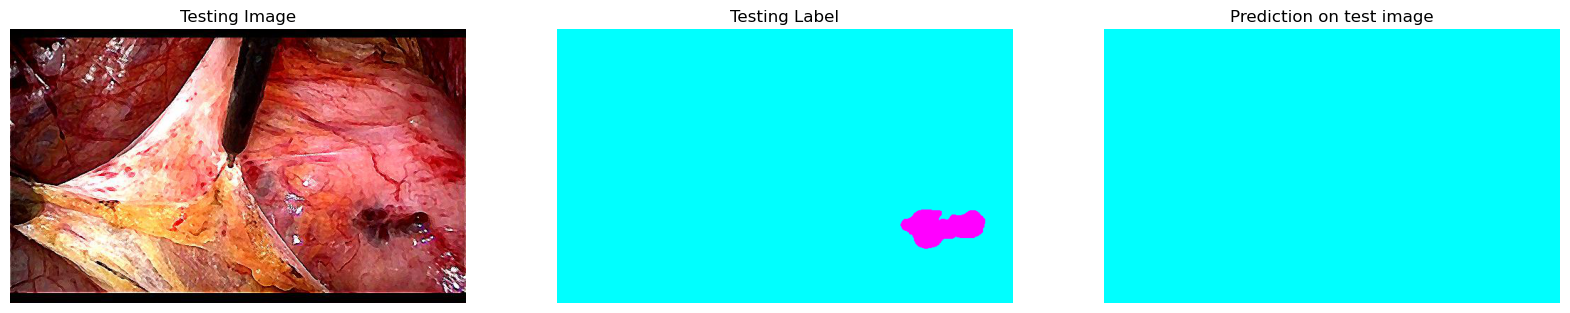

In [12]:
import matplotlib.pyplot as plt

test_img_number = random.randint(0, len(test_image_batch)-1)
test_img = test_image_batch[test_img_number]
print(test_img.shape)
ground_truth=test_mask_batch[test_img_number]
print(ground_truth.shape)

test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input))
print(prediction.shape)
predicted_img=np.argmax(prediction, axis=3)[0,:,:]
print(predicted_img.shape)

plt.figure(figsize=(20, 15))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.axis('off')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth, cmap='cool')
plt.axis('off')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='cool')
plt.axis('off')
plt.show()